In [116]:
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import scipy.integrate
import torch
from utils import load_imdb
import os, glob, zipfile
import torch
from torch.autograd import Variable
from torchtext import data, datasets, vocab
from torchtext.vocab import Vectors, GloVe

# import jtplot
from jupyterthemes import jtplot

# you can select an alternative theme's plot style by name
# oceans16 | grade3 | chesterish | onedork | monokai | solarizedl
jtplot.style('onedork')

# set "context" (paper, notebook, talk, or poster)
# & font scale (scalar applied to labels, legend, etc.)
jtplot.style('grade3', context='paper', fscale=1.4)

# turn on X- and Y-axis tick marks (default=False)
# and turn off the axis grid lines (default=True)
jtplot.style(ticks=True, grid=False)

# set the default figure size
# x (length), y (height)
jtplot.figsize(x=6., y=5.)

# or just adjust the aspect ratio
# new_length = length * aspect
jtplot.figsize(aspect=1.2)

### Problem 1b

C:\Users\Christopher\Anaconda3\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:518: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "
C:\Users\Christopher\Anaconda3\envs\py35\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


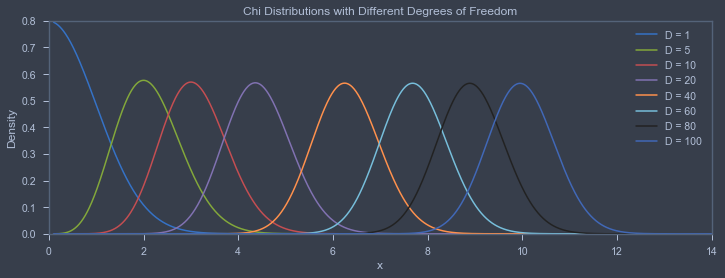

In [65]:
def chi_density(x, D):
    return 2*x*scipy.stats.chi2.pdf(x**2, D)

x = np.linspace(0.1, 14, 1000)
D_list = [1, 5, 10, 20, 40, 60, 80, 100]
for i in D_list:
    plt.plot(x, chi_density(x, i))
    plt.xlim([0, 14])
    plt.ylim([0, 0.8])
    plt.title('Chi Distributions with Different Degrees of Freedom')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend('top right', labels = ['D = ' + str(i) for i in D_list])
plt.show()

### Problem 1c

C:\Users\Christopher\Anaconda3\envs\py35\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


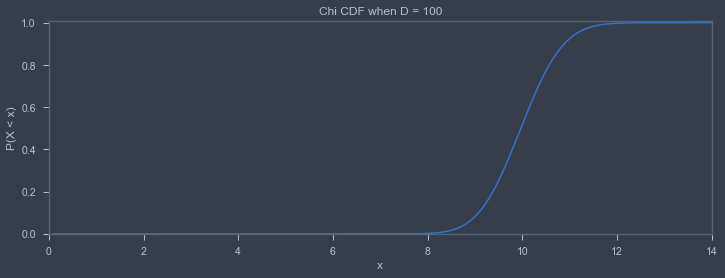

In [74]:
def chi_CDF(D, lower_end_point, upper_end_point):
    return scipy.integrate.quad(chi_density, lower_end_point, upper_end_point, args = (D))

x = np.linspace(0.1, 14, 1000)
D = 100
cdf_vals = np.zeros(len(x))
for i in range(len(x)):
    cdf_vals[i] = chi_CDF(D, 0.1, x[i])[0]

plt.plot(x, cdf_vals)
plt.xlim([0, 14])
plt.ylim([0, 1.01])
plt.title('Chi CDF when D = 100')
plt.xlabel('x')
plt.ylabel('P(X < x)')
plt.show()

### Problem 4

In [115]:
vocab.GloVe(name='6B', dim=300)

BadZipFile: File is not a zip file

In [117]:
train_iter, val_iter, test_iter, text_field = load_imdb(imdb_path='imdb.zip', imdb_dir='\imdb', batch_size=100, gpu=True, reuse=True,\
                                                        repeat=False, shuffle=True)

Loading Data


BadZipFile: File is not a zip file